In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries

In [7]:
series = TimeSeries.from_csv('data.csv', parse_dates=True, index_col=0)
series = series['STOXX Europe 600']

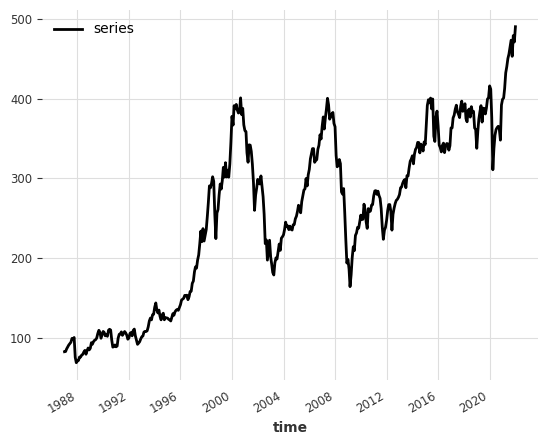

In [8]:
plot1 = series.plot(label='series')

In [9]:
train, test = series.split_after(0.8)

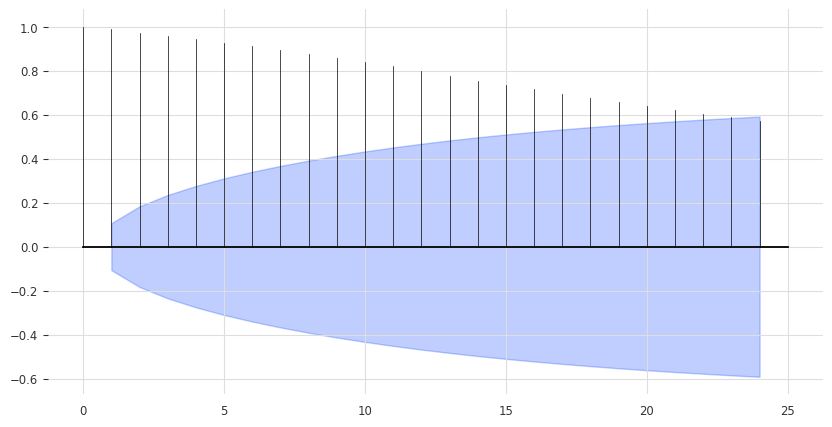

In [10]:
from darts.utils.statistics import plot_acf, check_seasonality

plot_acf(train, alpha=0.05)

In [11]:
for m in range(2, 25):
    is_seasonal, period = check_seasonality(train, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

In [12]:
from darts.models import ExponentialSmoothing, TBATS, AutoARIMA, Theta
from darts.metrics import mape

In [13]:
def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(test))
    print("model {} obtains MAPE: {:.2f}%".format(model, mape(test, forecast)))


eval_model(ExponentialSmoothing())
eval_model(TBATS())
eval_model(AutoARIMA())
eval_model(Theta())

model ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=12 obtains MAPE: 11.90%
model (T)BATS obtains MAPE: 10.65%
model Auto-ARIMA obtains MAPE: 10.59%
model Theta(2) obtains MAPE: 14.70%


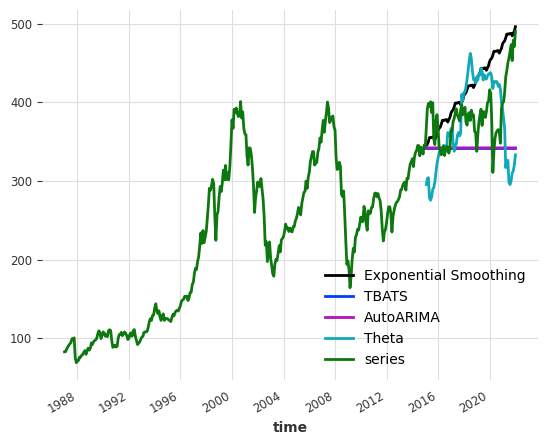

In [14]:
# plot all the forecast in one plot
ex = ExponentialSmoothing()
ex.fit(train)
forecast = ex.predict(len(test))
forecast.plot(label='Exponential Smoothing')

tb = TBATS()
tb.fit(train)
forecast = tb.predict(len(test))
forecast.plot(label='TBATS')

ar = AutoARIMA()
ar.fit(train)
forecast = ar.predict(len(test))
forecast.plot(label='AutoARIMA')

th = Theta()
th.fit(train)
forecast = th.predict(len(test))
forecast.plot(label='Theta')

series.plot(label='series')
plt.legend();

In [15]:
parameters_theta = {'theta': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'seasonality_period': [3, 6, 9, 12]}

In [16]:
result = Theta.gridsearch(parameters=parameters_theta, series=series, forecast_horizon=12)
best_model = result[1]
best_parameters = result[2]
print('Best model: ', best_model, ' with parameters: ', best_parameters)

Best model:  {'theta': 10, 'seasonality_period': 3}  with parameters:  9.447367240468212


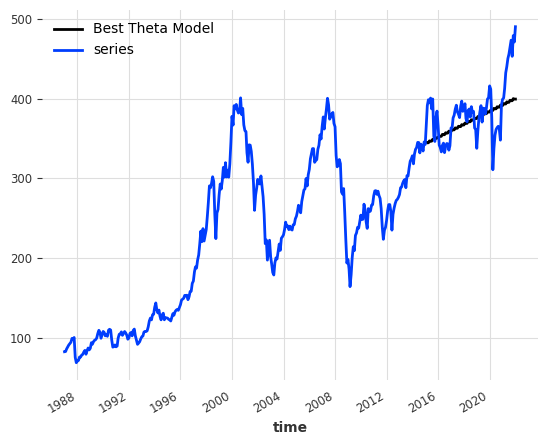

In [17]:
bestthetamodel = Theta(theta=10, seasonality_period=3)
bestthetamodel.fit(train)
forecast = bestthetamodel.predict(len(test))
forecast.plot(label='Best Theta Model')
series.plot(label='series')

  0%|          | 0/200 [00:00<?, ?it/s]

MAPE = 13.26%


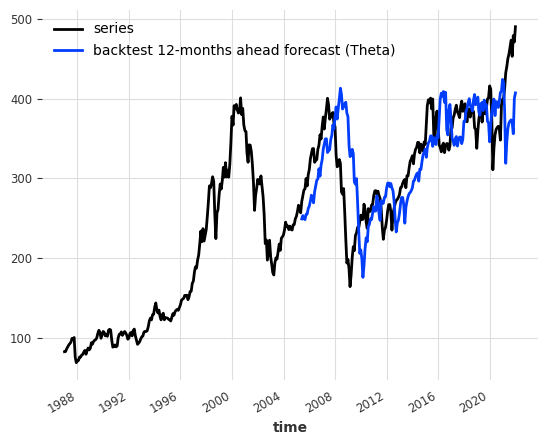

In [18]:
historical_forecast_theta = bestthetamodel.historical_forecasts(
    series, start = 0.5, forecast_horizon=12, verbose=True)
series.plot(label = 'series')
historical_forecast_theta.plot(label = 'backtest 12-months ahead forecast (Theta)')
print("MAPE = {:.2f}%".format(mape(historical_forecast_theta, series)))

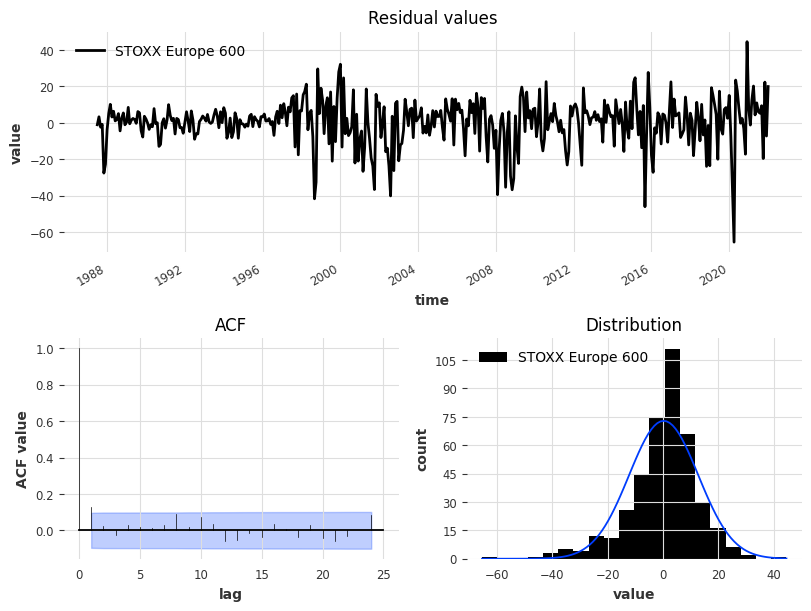

In [19]:
from darts.utils.statistics import plot_residuals_analysis

plot_residuals_analysis(bestthetamodel.residuals(series))

In [20]:
import sklearn

MAPE = 9.08


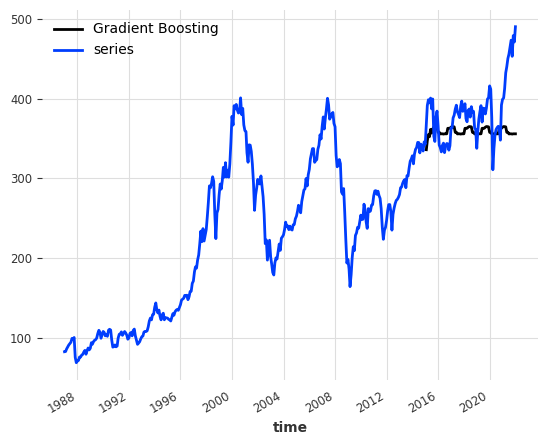

In [21]:
from darts.models import RegressionModel
from sklearn.ensemble import GradientBoostingRegressor

# gradient boosting model
gb_boosting = RegressionModel(lags=7,  
                              model=GradientBoostingRegressor(n_estimators=10000, learning_rate=0.2, max_depth=2, random_state=0))
gb_boosting.fit(train)
gb_boosting_forecast = gb_boosting.predict(len(test))
gb_boosting_forecast.plot(label='Gradient Boosting')
series.plot(label='series')
print("MAPE = %.2f" % (mape(gb_boosting_forecast, series)))
plt.legend();